Q4. Analyze a microbiome dataset. [30 pts]

• The dataset is available here.

• This dataset includes the microbiome profiles of 344 people, some with type
2 diabetes, and others without. The microbiome profile for a person stores
the relative abundance of different bacterial specie found in the stool sample
collected from that person. The last column shows the class (with diabetes or
not), and the other columns are for the relative abundances.

• Perform PCA and t-SNE on the dataset and visualize the data in 2D space. In
the plots, each data point is a user.

• Report what you learn from the PCA analyses. How much variability of the
data is captured by using only two dimensions? Is PCA a good approach
for dimensionality reduction for this dataset? Do you see clusters of people
according to their disease status?

• Does t-SNE result in a good dimensionality reduction of this dataset? Why or
why not

First, we will perform PCA on this dataset

In [1]:
import pandas as pd
import numpy as np
microbiome = pd.read_csv("T2D_abundance.csv",delim_whitespace=True)
microbiome.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [2]:
microbiome.shape

(344, 573)

In [3]:
microbiome.describe()


,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacteriales|f__Enterobacteriaceae|g__Providencia|s__Providencia_stuartii,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,...,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.109547,0.012080,0.006207,0.000016,0.000680,0.001636,0.001250,0.000016,0.005366,0.000272,...,0.000121,0.000137,0.000002,0.000092,0.000009,0.000034,0.000002,0.000015,0.000007,0.000027
std,0.637722,0.090682,0.063612,0.000293,0.003986,0.010100,0.019552,0.000213,0.018747,0.001512,...,0.002248,0.001897,0.000039,0.001567,0.000158,0.000524,0.000046,0.000270,0.000135,0.000508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002330,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.733550,1.369400,1.023360,0.005440,0.058200,0.159660,0.360720,0.003590,0.

In [4]:
class_column = microbiome['Class'].tolist()


In [5]:
microbiome = microbiome.drop('Class', 1)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(microbiome)
#the results will show that PC1 dominates for the original data
print("variance explained", pca.explained_variance_ratio_, "singular_values", pca.singular_values_)
print(pca.explained_variance_ratio_.sum())
#transform the data according to the PCA results
microbiome_transformed = pca.transform(microbiome)


variance explained [0.29922075 0.06936047] singular_values [337.41686876 162.45270412]
0.3685812133629984


Using PCA, the data matrix is projected to its first two principal components. The projected values of the original data are stored in a pandas DataFrame object named projected.



In [7]:
projected = pd.DataFrame(microbiome_transformed,columns=['pc1','pc2'],index=range(1,345))
projected['Class'] =class_column

projected

,pc1,pc2,Class
1,-2.943049,-2.248436,n
2,-7.215752,1.836456,n
3,24.051681,-4.850619,n
4,-8.684207,6.431572,n
5,2.565706,-3.969367,n
...,...,...,...
340,-7.294597,1.556832,n
341,-2.864927,18.011063,n
342,-8.629940,-7.939053,n
343,-6.603719,-2.611686,n


Text(0, 0.5, 'PC2')

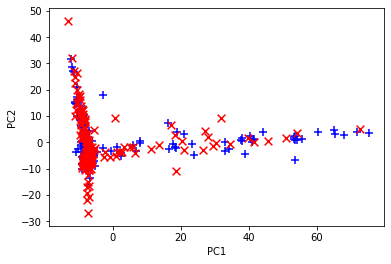

In [8]:
import matplotlib.pyplot as plt

colors = {'n':'b', 't2d':'r'}
markerTypes = {'n':'+', 't2d':'x'}

for classType in markerTypes:
    d = projected[projected['Class']==classType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[classType],s=60,marker=markerTypes[classType])

plt.xlabel("PC1")
plt.ylabel("PC2")

Finally, we draw a scatter plot to display the projected values. We can see that the class 't2d' values overlap with the 'n' class values, in many cases. Hence, there is not much variability captured using PCA with 2 components.From the given output, the variance is very low. Hence, PCA is a good approach to reduce this dataset. 

Now, we will perform t-SNE on this dataset. 

In [9]:
#t-sne:
from sklearn.manifold import TSNE

from numpy import reshape
import seaborn as sns

microbiome1 = pd.read_csv("T2D_abundance.csv",delim_whitespace=True)
microbiome1.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,...,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Oceanospirillales|f__Halomonadaceae|g__Halomonas|s__Halomonas_boliviensis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_kanaloae,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_axonopodis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Xanthomonadales|f__Xanthomonadaceae|g__Xanthomonas|s__Xanthomonas_fuscans,k__Bacteria|p__Tenericutes|c__Mollicutes|o__Mycoplasmatales|f__Mycoplasmataceae|g__Mycoplasma|s__Mycoplasma_bovis,k__Bacteria|p__Bacteroidetes|c__Flavobacteriia|o__Flavobacteriales|f__Flavobacteriaceae|g__Zunongwangia|s__Zunongwangia_profunda,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_pallens,k__Bacteria|p__Planctomycetes|c__Planctomycetia|o__Planctomycetales|f__Planctomycetaceae|g__Rhodopirellula|s__Rhodopirellula_unclassified,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Vibrionales|f__Vibrionaceae|g__Vibrio|s__Vibrio_furnissii,Class
con-001,0.33364,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-002,0.49776,0.12802,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-003,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.01254,0.00262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-004,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.02847,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n
con-005,0.49446,0.06786,0.0,0.0,0.0,0.0,0.0,0.0,0.02221,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,n


In [10]:
class_column1 = microbiome1['Class'].tolist()
class_column1

['n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 't2d',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n',
 'n'

In [11]:
microbiome1 = microbiome1.drop('Class', 1)

In [12]:
x = microbiome1
y = class_column1

Then, we'll define the model by using the TSNE class, here the n_components parameter defines the number of target dimensions. 

In [13]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 344 samples in 0.069s...
[t-SNE] Computed neighbors for 344 samples in 0.241s...
[t-SNE] Computed conditional probabilities for sample 344 / 344
[t-SNE] Mean sigma: 9.567743
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.894165
[t-SNE] KL divergence after 1000 iterations: 0.865274


Now, we will visualize the data.

[Text(0.5, 1.0, 'Microbiome Data T-SNE projection')]

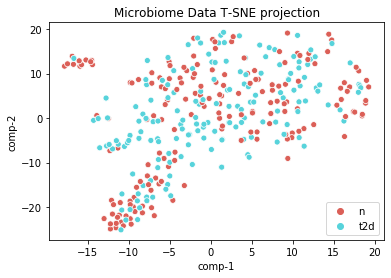

In [14]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),palette=sns.color_palette("hls", 2),data=df).set(title="Microbiome Data T-SNE projection") 

t-SNE offers slightly better separation of the classes and there is not much overlap between the data points. It offers good dimensionality reduction too. 

Q5. The plot below was used to demonstrate the Curse of Dimensionality. Implement
a code to simulate your own data, and generate your special plot of curse of dimensionality. Try dimensions from 2 to 50 with a step size of 1. And for each
dimension, randomly generate 500 data points. Use Euclidean distance. [30 pts]

We are assuming A is the set of points given and B is the reference point, if you compute the distance from B to each of the points in B, the difference between the maximum distance and the minimum distance goes to 0. 

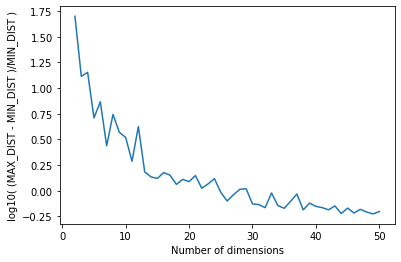

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

log_values = []
for step in range(2,51):
    # Generate 500 random points in N dimensions.
    A = [np.random.randint(-50, 50, step) for _ in range(500)]
    B = np.random.randint(-50,50,step)
    # Computing distances as per the given problem
    #https://www.delftstack.com/howto/numpy/calculate-euclidean-distance/
    diffs = [np.linalg.norm(a-B) for a in A]
    mxd = max(diffs)
    mnd = min(diffs)
    #taking log of whole equation
    log_value = math.log10((mxd-mnd)/mnd)
    log_values.append( log_value )

# Plotting the curve for simulated data using matplotlib
plt.plot(range(2,51),log_values)
plt.xlabel('Number of dimensions')
plt.ylabel('log10( (MAX_DIST - MIN_DIST )/MIN_DIST )')
plt.show()

If we take log of only the numerator in the function for the y axis, we get a better and much smoother curve. 

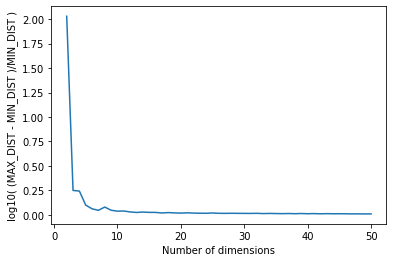

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

log_values = []
for step in range(2,51):
    # Generate 500 random points in N dimensions.
    A = [np.random.randint(-50, 50, step) for _ in range(500)]
    B = np.random.randint(-50,50,step)
    # Computing distances as per the given problem
    #https://www.delftstack.com/howto/numpy/calculate-euclidean-distance/
    diffs = [np.linalg.norm(a-B) for a in A]
    mxd = max(diffs)
    mnd = min(diffs)
    #taking log of whole equation
    log_value = math.log10(mxd-mnd)/mnd
    log_values.append( log_value )

# Plotting the curve for simulated data using matplotlib
plt.plot(range(2,51),log_values)
plt.xlabel('Number of dimensions')
plt.ylabel('log10( (MAX_DIST - MIN_DIST )/MIN_DIST )')
plt.show()

References:
    
[1]. https://stackoverflow.com/questions/69247773/generating-a-curse-of-dimensionality-chart

[2]. https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html

[3]. https://www.kaggle.com/morecoding/scalingpca-demo/

[4]. https://www.kaggle.com/morecoding/datapreprocessing

[5]. https://www.delftstack.com/howto/numpy/calculate-euclidean-distance/